## What steps do we need to undertake?
1. Train the model with the small amount of labeled training data just like you would in supervised learning, until it gives you good results.
2. Then use it with the unlabeled training dataset to predict the outputs, which are pseudo labels since they may not be quite accurate.
3. Link the labels from the labeled training data with the pseudo labels created in the previous step.
4. Link the data inputs in the labeled training data with the inputs in the unlabeled data.
5. Then, train the model the same way as you did with the labeled set in the beginning in order to decrease the error and improve the model’s accuracy.

In [22]:
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from matplotlib import pyplot
import seaborn as sns
import matplotlib.pyplot as plt 

In [23]:
df = pd.read_csv('../Source/preprocessed_data.csv', sep= ',')
labels = pd.read_csv('../Source/labels.csv', sep= ',')

In [24]:
labels['genre'] = labels.genre.astype('category')
labels['genre'] = labels['genre'].cat.codes

In [25]:
#X_train, X_test, y_train, y_test = train_test_split(df, labels train_size= 0.8, random_state= 42069)

In [26]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
pca1 = [item[0] for item in df]
pca2 = [item[1] for item in df]
pca3 = [item[2] for item in df]

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.scatter(df.iloc[:, 1], df.iloc[:, 2], df.iloc[:, 3], c=labels)
plt.show()

sns.set(style = "darkgrid")
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
pca1 = [item[0] for item in df]
pca2 = [item[1] for item in df]
pca3 = [item[2] for item in df]

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.scatter(df.iloc[:, 4], df.iloc[:, 5], df.iloc[:, 6], c=labels)
plt.show()

sns.set(style = "darkgrid")
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
pca1 = [item[0] for item in df]
pca2 = [item[1] for item in df]
pca3 = [item[2] for item in df]

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.scatter(df.iloc[:, 7], df.iloc[:, 8], df.iloc[:, 9], c=labels)
plt.show()

sns.set(style = "darkgrid")
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
pca1 = [item[0] for item in df]
pca2 = [item[1] for item in df]
pca3 = [item[2] for item in df]

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.scatter(df.iloc[:, 9], df.iloc[:, 10], df.iloc[:, 11], c=labels)
plt.show()

In [27]:
k=26
kmeans = KMeans(n_clusters=k, max_iter=1000)
X_dist = kmeans.fit_transform(df) 
representative_idx = np.argmin(X_dist, axis=1) 
from sklearn.metrics import accuracy_score


[0.32572964668947624, 0.1590007073022353, 0.10407972697534612, 0.08765788098876429, 0.07628551314011485, 0.0648100550569811, 0.058413765612276534, 0.04027036214094741, 0.030862897143730132, 0.023873321198739774, 0.019341777568278453, 0.009674346183110114]


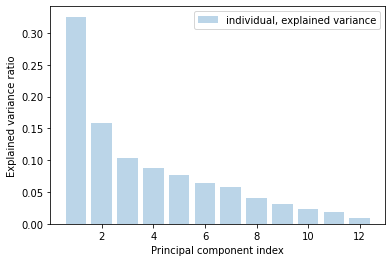

In [28]:
#df.to_numpy()

# Compute covariance matrix and eigenvalues (EVal) / eigenvectors (EVec)
cov_mat = np.cov(df.T)
EVal, EVec = np.linalg.eig(cov_mat)


# Calculate (sum of) explained variances
sum_EVal = sum(EVal)
var_exp = [(i / sum_EVal) for i in sorted(EVal, reverse=True)]
print(var_exp)
scurr = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


# Plot explained variances
plt.bar(scurr, var_exp, alpha=0.3, 
        align='center', label='individual, explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()


sns.set(style = "darkgrid")
fig = plt.figure()
ax = fig.add_subplot(111)
pca1 = [item[0] for item in df_pca]
pca2 = [item[1] for item in df_pca]
#pca3 = [item[2] for item in df_pca]

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

ax.scatter(pca1, pca2, c=labels['genre'])
plt.show()

In [29]:
k=26
kmeans2 = KMeans(n_clusters=k, max_iter=1000)
X_dist = kmeans.fit_transform(df_pca) 
representative_idx2 = np.argmin(X_dist, axis=1) 

In [30]:
accuracy_score(labels, representative_idx2)

0.03664000362044192

sns.set(style = "darkgrid")
fig = plt.figure()
ax = fig.add_subplot(111)
pca1 = [item[0] for item in df_pca]
pca2 = [item[1] for item in df_pca]
#pca3 = [item[2] for item in df_pca]

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

ax.scatter(pca1, pca2, c=representative_idx2)
plt.show()